<a href="https://www.kaggle.com/code/laxmivatsalyadaita/med-students-data-analysis?scriptVersionId=138921834" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**If you like my notebook, please don't forget to upvote! You can also make a copy of my notebook and edit to run your additional analysis.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-students-dataset/medical_students_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Dataset

In [3]:
raw_data = pd.read_csv('/kaggle/input/medical-students-dataset/medical_students_dataset.csv')
raw_data.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


In [4]:
raw_data.shape

(200000, 13)

In [5]:
raw_data.columns.values

array(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type',
       'BMI', 'Temperature', 'Heart Rate', 'Blood Pressure',
       'Cholesterol', 'Diabetes', 'Smoking'], dtype=object)

In [6]:
raw_data.duplicated().sum()

7644

Looks like the dataset has many duplicate data entries. It is always good to make a copy of our data before working on it.

In [7]:
data = raw_data.copy()
data.head()

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


Let's remove all the duplicate rows in the dataset.

In [8]:
data = data.drop_duplicates()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192356 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      172465 non-null  float64
 1   Age             172464 non-null  float64
 2   Gender          172432 non-null  object 
 3   Height          172449 non-null  float64
 4   Weight          172455 non-null  float64
 5   Blood Type      172440 non-null  object 
 6   BMI             172456 non-null  float64
 7   Temperature     172445 non-null  float64
 8   Heart Rate      172453 non-null  float64
 9   Blood Pressure  172464 non-null  float64
 10  Cholesterol     172463 non-null  float64
 11  Diabetes        172451 non-null  object 
 12  Smoking         172459 non-null  object 
dtypes: float64(9), object(4)
memory usage: 20.5+ MB


In [10]:
print('Gender:',data['Gender'].unique())
print('Blood Type:',data['Blood Type'].unique())
print('Diabetes:',data['Diabetes'].unique())
print('Smoking:',data['Smoking'].unique())

Gender: ['Female' 'Male' nan]
Blood Type: ['O' 'B' 'A' 'AB' nan]
Diabetes: ['No' 'Yes' nan]
Smoking: [nan 'No' 'Yes']


# Data Cleaning

In [11]:
data.isnull().sum()

Student ID        19891
Age               19892
Gender            19924
Height            19907
Weight            19901
Blood Type        19916
BMI               19900
Temperature       19911
Heart Rate        19903
Blood Pressure    19892
Cholesterol       19893
Diabetes          19905
Smoking           19897
dtype: int64

Handling missing values in Age by filling in the mean age,

In [12]:
data['Age'] = data['Age'].replace(np.NaN, data['Age'].mean())

Let's assume a new category for people who's gender is not mentioned and call them others.

In [13]:
data['Gender'] = data['Gender'].fillna('Other')

Handling missing values in Height and weight by filling in the mean values.

In [14]:
data['Height'] = data['Height'].replace(np.NaN, data['Height'].mean())
data['Weight'] = data['Weight'].replace(np.NaN, data['Weight'].mean())

Considering that height is in centimeters and weight is in kilograms, BMI can be calculated as the weight(kg)/height(m)^2. We will use this formula to fill the missing BMI values.

In [15]:
missing_indices = data[data['BMI'].isnull()].index
data.loc[missing_indices, 'BMI'] = data.loc[missing_indices, 'Weight'] / (data.loc[missing_indices, 'Height'] ** 2)

Let's replace the missing values in temperature, heart rate, blood pressure and cholesterol with the corresponding mean values. 

In [16]:
data['Temperature'] = data['Temperature'].replace(np.NaN, data['Temperature'].mean())
data['Heart Rate'] = data['Heart Rate'].replace(np.NaN, data['Heart Rate'].mean())
data['Blood Pressure'] = data['Blood Pressure'].replace(np.NaN, data['Blood Pressure'].mean())
data['Cholesterol'] = data['Cholesterol'].replace(np.NaN, data['Cholesterol'].mean())

In [17]:
data.shape

(192356, 13)

In [18]:
data.isnull().sum() * 100 / len(data)

Student ID        10.340722
Age                0.000000
Gender             0.000000
Height             0.000000
Weight             0.000000
Blood Type        10.353719
BMI                0.000000
Temperature        0.000000
Heart Rate         0.000000
Blood Pressure     0.000000
Cholesterol        0.000000
Diabetes          10.348001
Smoking           10.343842
dtype: float64

Since the percentage of missing values is around 10% in the remaining columns, let's drop those observations and check. But before that, let's drop the Student ID column as it does not provide any information.

In [19]:
data = data.drop(['Student ID'], axis=1)

In [20]:
data.dropna(axis=0, inplace=True)

In [21]:
# after handling
data.isnull().sum()

Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

The resulting data does not contain any missing values. 

In [22]:
data.shape

(138466, 12)

It can be seen that around 30.76% of data has been dropped as part of data cleaning.

In [23]:
data_cleaned = data.copy()

# Exploratory Data Analysis

**EDA of Categorical variables:**

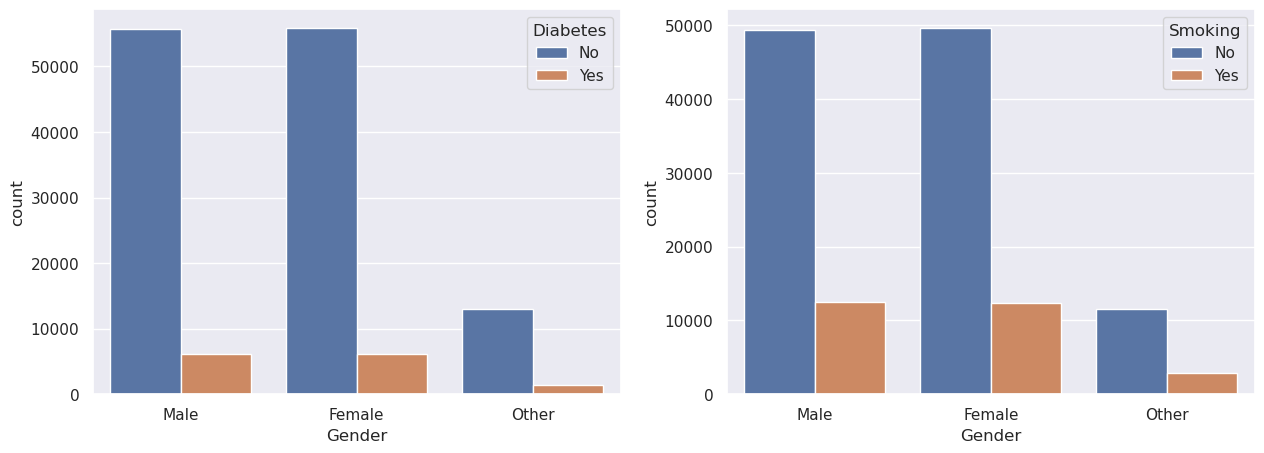

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x='Gender', hue='Diabetes', data=data_cleaned, ax=ax[0])
sns.countplot(x='Gender', hue='Smoking', data=data_cleaned, ax=ax[1])
fig.show()